id                    int64
name                 object
substitute0          object
substitute1          object
substitute2          object
substitute3          object
substitute4          object
sideEffect0          object
sideEffect1          object
sideEffect2          object
sideEffect3          object
sideEffect4          object
sideEffect5          object
sideEffect6          object
sideEffect7          object
sideEffect8          object
sideEffect9          object
sideEffect10         object
sideEffect11         object
sideEffect12         object
sideEffect13         object
sideEffect14         object
sideEffect15         object
sideEffect16         object
sideEffect17         object
sideEffect18         object
sideEffect19         object
sideEffect20         object
sideEffect21         object
sideEffect22         object
sideEffect23         object
sideEffect24         object
sideEffect25         object
sideEffect26         object
sideEffect27         object
sideEffect28        

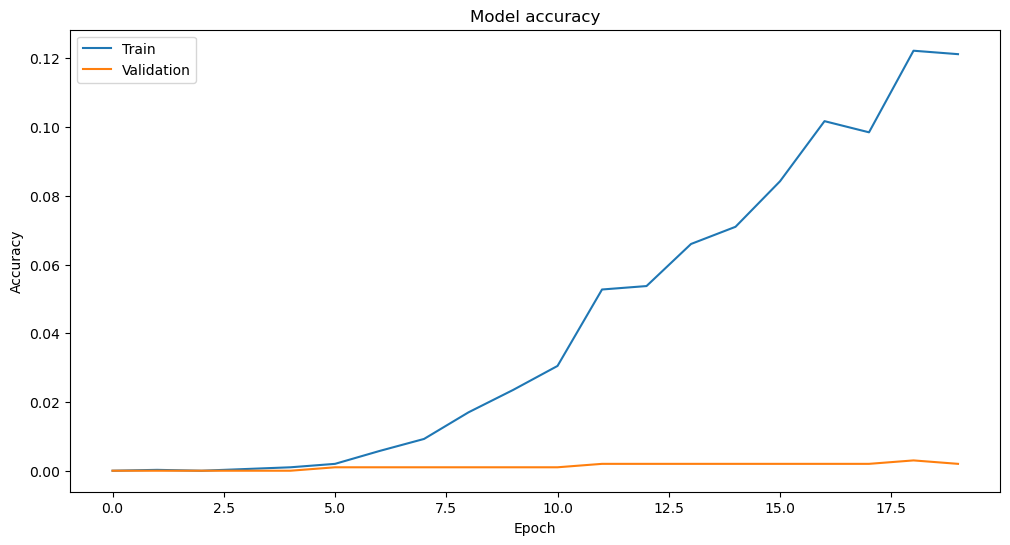

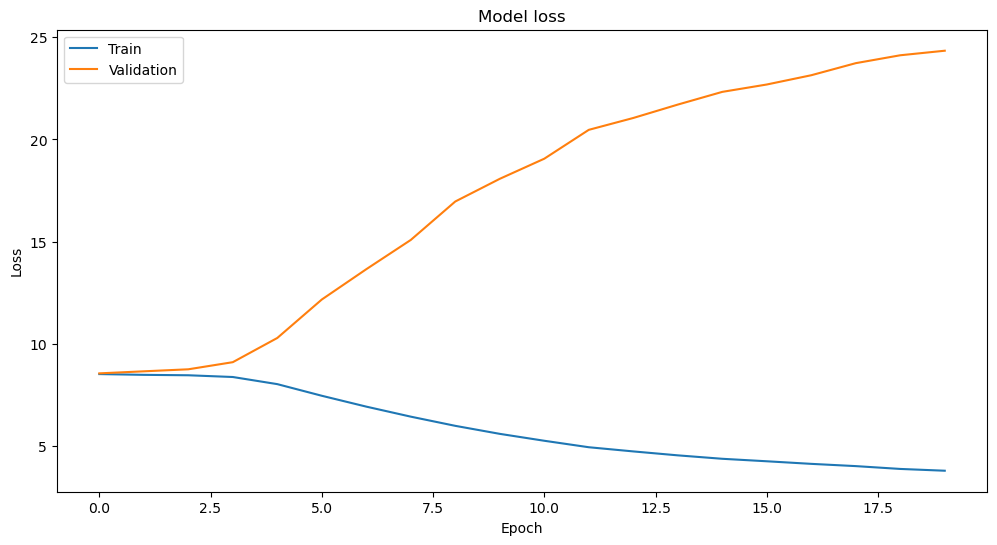

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step
Recommended Medicine: patient
Review: This medicine worked great for my headache.
Sentiment: {'neg': 0.0, 'neu': 0.594, 'pos': 0.406, 'compound': 0.6249}
Review: I had severe side effects after taking this medication.
Sentiment: {'neg': 0.245, 'neu': 0.755, 'pos': 0.0, 'compound': -0.3818}
Review: Not effective at all, very disappointed.
Sentiment: {'neg': 0.598, 'neu': 0.402, 'pos': 0.0, 'compound': -0.7138}
Review: Relieved my symptoms quickly with no side effects.
Sentiment: {'neg': 0.204, 'neu': 0.556, 'pos': 0.241, 'compound': 0.1027}
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
                                                   precision    recall  f1-score   support

                                 a-ret 0.1% cream       0.00      0.00      0.00         1
                                aasfur 250 tablet       0.00      0.00      0.00         1
                           abflox 50mg suspension       0.00      0.00      0.00         1
          

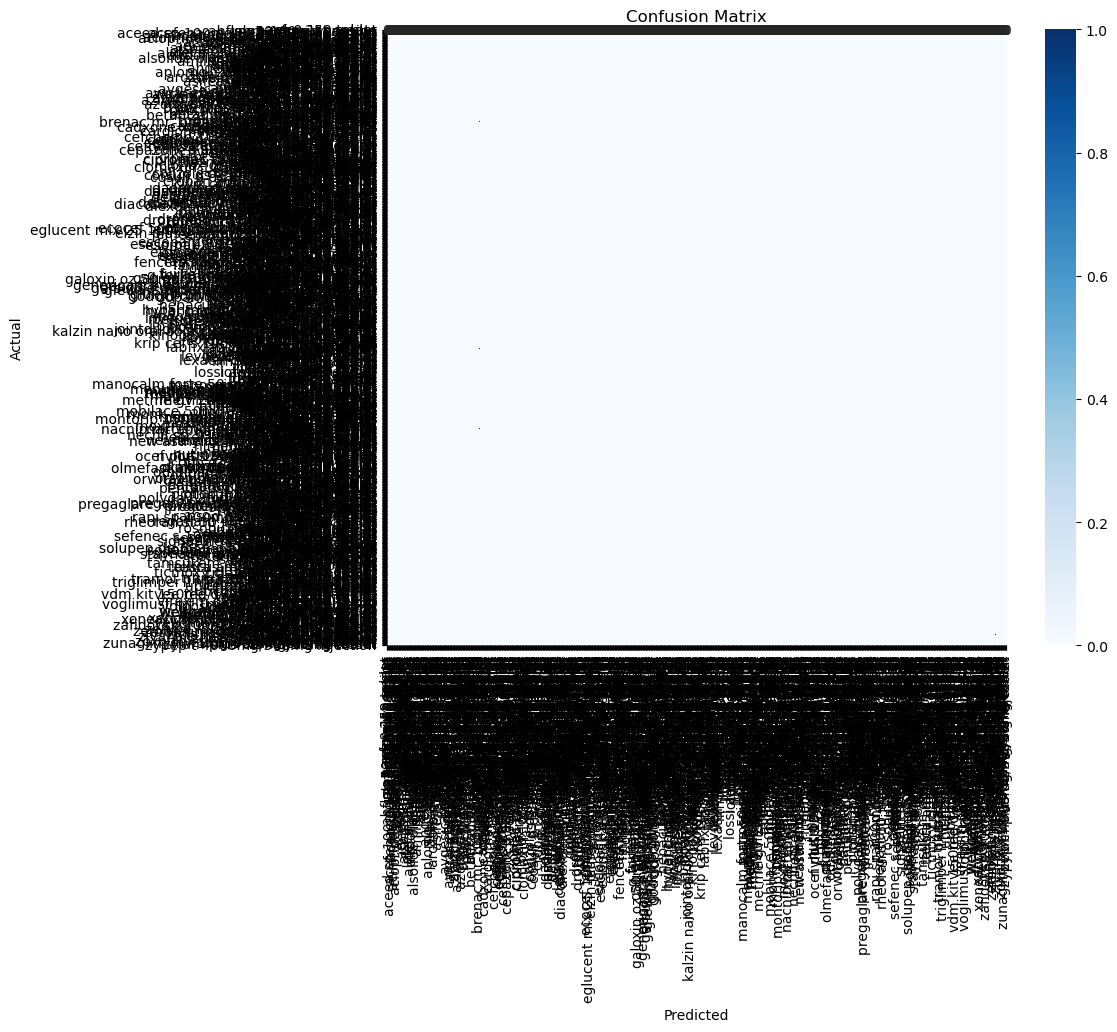

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
import scipy.sparse as sp
import matplotlib.pyplot as plt
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset with low_memory=False to avoid the DtypeWarning
file_path = 'medicine_dataset.csv'
medicine_data = pd.read_csv(file_path, low_memory=False)
medicine_data.fillna('', inplace=True)

# Inspect data types and fix mixed types if necessary
print(medicine_data.dtypes)

# Clean text data
def clean_text(text):
    return text.lower().replace('_', ' ')

text_columns = ['name', 'substitute0', 'substitute1', 'substitute2', 'substitute3', 'substitute4',
                'sideEffect0', 'sideEffect1', 'sideEffect2', 'use0', 'use1', 'Chemical Class',
                'Therapeutic Class', 'Action Class']

for col in text_columns:
    medicine_data[col] = medicine_data[col].apply(clean_text)

medicine_data['combined_text'] = medicine_data[text_columns].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

# Remove duplicates
medicine_data = medicine_data.drop_duplicates()

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X = vectorizer.fit_transform(medicine_data['combined_text'])
y = medicine_data['name']

# Sample a larger subset of the data for initial testing without stratification
sample_size = 5000
X_sample, _, y_sample, _ = train_test_split(X, y, train_size=sample_size, random_state=42)

# Split the sample data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

# Combine labels from both training and test sets before fitting the LabelEncoder
all_labels = pd.concat([y_train, y_test])
label_encoder = LabelEncoder()
label_encoder.fit(all_labels)

# Encode the target labels
y_train_encoded = label_encoder.transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Verify that the encoded labels are within the valid range
print(f"Training labels range: {y_train_encoded.min()} to {y_train_encoded.max()}")
print(f"Testing labels range: {y_test_encoded.min()} to {y_test_encoded.max()}")

# Define the patient questionnaire function
def collect_patient_data():
    patient_data = {
        'primary_reason': "headache",
        'allergies': "none",
        'current_medications': "aspirin",
        'adverse_reactions': "none",
        'chronic_conditions': "none",
        'recent_surgeries': "none",
        'drug_alcohol_abuse': "no",
        'symptoms': "headache, nausea",
        'symptom_severity': "moderate",
        'previous_treatments': "aspirin, ibuprofen",
        'side_effects_current_medications': "none",
        'daily_diet': "balanced",
        'smoking': "no",
        'alcohol_consumption': "occasionally",
        'recreational_drugs': "none",
        'physical_activity': "moderate",
        'pregnancy_status': "no",
        'pregnancy_concerns': "no",
        'mental_health_conditions': "none",
        'current_mood': "good",
        'family_history_conditions': "none",
        'medication_preferences': "none",
        'alternative_therapies': "none",
        'difficulty_swallowing': "no",
        'understanding_medication': "yes",
        'medication_goals': "relieve symptoms",
        'concerns_side_effects': "no",
        'preferences_timing': "no",
        'follow_up_frequency': "monthly",
        'monitor_side_effects': "yes"
    }
    return patient_data

# Collect patient data
patient_data = collect_patient_data()

# Convert patient data to DataFrame for easy manipulation
patient_df = pd.DataFrame([patient_data])

# Process text data (e.g., combine all text fields into one column)
text_fields = [
    'primary_reason', 'allergies', 'current_medications', 'adverse_reactions', 'chronic_conditions',
    'recent_surgeries', 'drug_alcohol_abuse', 'symptoms', 'symptom_severity', 'previous_treatments',
    'side_effects_current_medications', 'daily_diet', 'smoking', 'alcohol_consumption', 'recreational_drugs',
    'physical_activity', 'pregnancy_status', 'pregnancy_concerns', 'mental_health_conditions', 'current_mood',
    'family_history_conditions', 'medication_preferences', 'alternative_therapies', 'difficulty_swallowing',
    'understanding_medication', 'medication_goals', 'concerns_side_effects', 'preferences_timing',
    'follow_up_frequency', 'monitor_side_effects'
]

# Combine text fields into a single feature for vectorization
patient_df['combined_text'] = patient_df[text_fields].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

# Vectorize the combined text data using the same vectorizer
patient_vector = vectorizer.transform(patient_df['combined_text'])

# Combine patient vector with medicine vectors for model training
X_combined = sp.vstack([X_train, patient_vector])
y_combined = pd.concat([y_train, pd.Series(['patient'])])

# Ensure the patient label is correctly handled
if 'patient' not in label_encoder.classes_:
    label_encoder.classes_ = np.append(label_encoder.classes_, 'patient')

# Encode the combined labels
y_combined_encoded = label_encoder.transform(y_combined)

# Verify that the combined encoded labels are within the valid range
print(f"Combined labels range: {y_combined_encoded.min()} to {y_combined_encoded.max()}")

# Build a simple feedforward neural network
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model with smaller batch size and fewer epochs
history = model.fit(X_combined.toarray(), y_combined_encoded, epochs=20, batch_size=32, validation_data=(X_test.toarray(), y_test_encoded))

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Predict medicine recommendations for the patient
patient_prediction = model.predict(patient_vector.toarray())
predicted_medicine_index = np.argmax(patient_prediction, axis=1)
recommended_medicine = label_encoder.inverse_transform(predicted_medicine_index)

print(f"Recommended Medicine: {recommended_medicine[0]}")

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Sample user reviews for medicines
user_reviews = [
    "This medicine worked great for my headache.",
    "I had severe side effects after taking this medication.",
    "Not effective at all, very disappointed.",
    "Relieved my symptoms quickly with no side effects."
]

# Analyze sentiment of user reviews
for review in user_reviews:
    sentiment = analyzer.polarity_scores(review)
    print(f"Review: {review}")
    print(f"Sentiment: {sentiment}")

# Predictions on the test set
y_pred = model.predict(X_test.toarray())
y_pred_classes = np.argmax(y_pred, axis=1)

# Classification report with zero_division parameter
unique_test_labels = np.unique(y_test_encoded)
print(classification_report(y_test_encoded, y_pred_classes, labels=unique_test_labels, target_names=label_encoder.inverse_transform(unique_test_labels), zero_division=0))

# Confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_classes, labels=unique_test_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.inverse_transform(unique_test_labels), yticklabels=label_encoder.inverse_transform(unique_test_labels))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
